Chicago Crime Project

Mikhail Revenko

The crime-budget correlation coefficent is:  -0.8677414860679538
The arrest rate-budget correlation coefficent is:  -0.6095641097725155


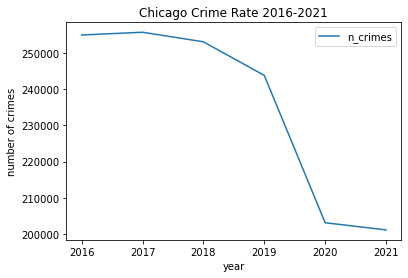

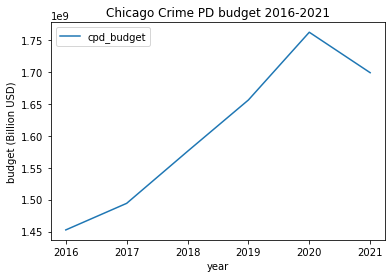

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cpd_budget = pd.read_csv("CPD_budget_2016_2021.csv", encoding="utf-8-sig")
cpd_stats = pd.read_csv("Chicago_Crime_2016_2022.csv", encoding="utf-8-sig")

cpd_budget.rename(columns = {'CPD_budget' : 'cpd_budget'}, inplace = True)

non_crim_filter = ["NON-CRIMINAL (SUBJECT SPECIFIED)","NON - CRIMINAL","NON-CRIMINAL"]
arrest_rate_bias_filter = ["CONCEALED CARRY LICENSE VIOLATION","GAMBLING","INTERFERENCE WITH PUBLIC OFFICER","LIQUOR LAW VIOLATION","NARCOTICS","OTHER NARCOTIC VIOLATION"]

cpd_arrests = cpd_stats[~cpd_stats["primary_type"].isin(non_crim_filter)]
cpd_arrests = cpd_arrests[~cpd_arrests["primary_type"].isin(arrest_rate_bias_filter)]
cpd_arrests = cpd_arrests[cpd_arrests["arrest"] == True]
cpd_arrests = cpd_arrests.groupby(['year'])["primary_type"].count().reset_index()
cpd_arrests.rename(columns = {'primary_type' : 'n_arrests'}, inplace = True)

cpd_crimes = cpd_stats[~cpd_stats["primary_type"].isin(non_crim_filter)]
cpd_crimes = cpd_crimes[~cpd_crimes["primary_type"].isin(arrest_rate_bias_filter)]
cpd_crimes = cpd_crimes.groupby(['year'])["primary_type"].count().reset_index()
cpd_crimes.rename(columns = {'primary_type' : 'n_crimes'}, inplace = True)

def arrest_rate_calc(n_arrest , n_crime):
    return (n_arrest / n_crime) * 100

cpd_arrest_rate = pd.merge(cpd_arrests, cpd_crimes, on = 'year')
cpd_arrest_rate['arrest_rate %'] = list(map(arrest_rate_calc, cpd_arrests['n_arrests'], cpd_crimes['n_crimes']))
cpd_budget_arrest_stats = pd.merge(cpd_arrest_rate, cpd_budget, on = 'year')

budget_crime_correlation = np.corrcoef(cpd_budget_arrest_stats['n_crimes'], cpd_budget_arrest_stats['cpd_budget'])
budget_arrest_rate_correlation = np.corrcoef(cpd_budget_arrest_stats['arrest_rate %'], cpd_budget_arrest_stats['cpd_budget'])

print("The crime-budget correlation coefficent is: ", budget_crime_correlation[0][1])
print("The arrest rate-budget correlation coefficent is: ", budget_arrest_rate_correlation[0][1])

cpd_budget_arrest_stats.plot(kind = 'line', x = 'year', y = 'n_crimes')
plt.xlabel('year')
plt.ylabel('number of crimes')
plt.title('Chicago Crime Rate 2016-2021')
plt.show()

cpd_budget_arrest_stats.plot(kind = 'line', x = 'year', y = 'cpd_budget')
plt.xlabel('year')
plt.ylabel('budget (Billion USD)')
plt.title('Chicago Crime PD budget 2016-2021')
plt.show()


Notes: 

~ gives the opposite result for the isin function. Basically makes it "isnot"

.size() used to count number of rows for grouping by year

.reset_index returns a normal table dataframe instead of a series

